# Ridge Regression
Ridge regression shrinks the regression coefficients by imposing a penalty on their size.

The criterion of the Ridge regression is given as:

$$\text{RSS}(\lambda) = (\mathbf{y}-\mathbf{X}\beta)^\top(\mathbf{y}-\mathbf{X}\beta) + \lambda\beta^\top\beta$$

minimizing this criterion w.r.t $\beta$ gives:

$$\hat\beta_{ridge} = (\mathbf{X}^\top\mathbf{X} + \lambda\mathbf{I})^{-1} \mathbf{X}^\top \mathbf{y}$$

##### proof:

$$\begin{aligned}
\text{RSS}(\lambda) &= (\mathbf{y}-\mathbf{X}\beta)^\top(\mathbf{y}-\mathbf{X}\beta) + \lambda\beta^\top\beta\\
&= (\mathbf{y}^\top-\beta^\top\mathbf{X}^\top)(\mathbf{y}-\mathbf{X}\beta) + \lambda\beta^\top\beta\\
&= \mathbf{y}^\top\mathbf{y} - \mathbf{y}^\top\mathbf{x}\beta-\beta^\top\mathbf{x}^\top\mathbf{y} + \beta^\top\mathbf{x}^\top\mathbf{x}\beta + \lambda\beta^\top\beta\\
&= \mathbf{y}^\top\mathbf{y} - 2\mathbf{y}^\top\mathbf{x}\beta + \beta^\top\mathbf{x}^\top\mathbf{x}\beta + \lambda\beta^\top\beta
\end{aligned}$$

minimizing this w.r.t $\beta$ and equating to $0$:

$$\begin{aligned}
\frac{\partial RSS}{\partial \beta} &= 0 = 0-2\mathbf{X}^\top\mathbf{y} +(\mathbf{X}^\top\mathbf{X} + \mathbf{X}^\top\mathbf{X})\beta + 2\lambda\beta\\
&=-\mathbf{X}^\top\mathbf{y} + (\mathbf{X}^\top\mathbf{X} + \lambda\mathbf{I})\beta\\
\hat\beta_{ridge} &= (\mathbf{X}^\top\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}^\top\mathbf{y}
\end{aligned}$$

The *Singular Value Decomposition* (SVD) of the centered input matrix $\mathbf{X}$ gives us some additional insight into the analysis of many statistical methods. The SVD of $\mathbf{X}$ has the form:

$$\mathbf{X}=\mathbf{U}\mathbf{D}\mathbf{V}^\top$$

wher $\mathbf{U}$ and $\mathbf{V}$ are $N\times p$ and $p\times p$ orthogonal matrices, and $\mathbf{D}$ is a $p\times p$ diagonal matrix, with entries $d_1\geq d_2\geq \cdots \geq d_p \geq 0$, called the singular values of $\mathbf{X}$.

**NOTE**: properties of an orthogonal matrix $\mathbf{Q}$:
$$\mathbf{Q}^\top\mathbf{Q} = \mathbf{Q}\mathbf{Q}^\top = \mathbf{I}\\
\mathbf{Q}^\top = \mathbf{Q}^{-1}$$

Using the SVD, the ridge prediction can be presented as follows:

$$\begin{aligned}
\mathbf{X}\hat\beta_{ridge} = \mathbf{U}\mathbf{D}(\mathbf{D}^2 + \lambda\mathbf{I})^{-1}\mathbf{D}\mathbf{U}^\top\mathbf{y}
\end{aligned}$$

##### proof: 
we are going to do some cancellations using the orthogonal and diagonal properties:

$$\begin{aligned}
\mathbf{X}\hat\beta_{ridge} &= \mathbf{X}(\mathbf{X}^\top\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}^\top\mathbf{y}\\
&=\mathbf{U}\mathbf{D}\mathbf{V}^\top \left((\mathbf{U}\mathbf{D}\mathbf{V}^\top)^\top(\mathbf{U}\mathbf{D}\mathbf{V}^\top) + \lambda\mathbf{I}\right)^{-1}(\mathbf{U}\mathbf{D}\mathbf{V}^\top)^\top\mathbf{y}\\
&=\mathbf{U}\mathbf{D}\mathbf{V}^\top \left(\mathbf{V}\mathbf{D}\mathbf{U}^\top\mathbf{U}\mathbf{D}\mathbf{V}^\top + \lambda\mathbf{I}\right)^{-1}(\mathbf{V}\mathbf{D}\mathbf{U}^\top)\mathbf{y}\\
&=\mathbf{U}\mathbf{D}\mathbf{V}^\top \left(\mathbf{V}\mathbf{D}^2\mathbf{V}^\top + \lambda\mathbf{I}\right)^{-1}(\mathbf{V}\mathbf{D}\mathbf{U}^\top)\mathbf{y}\\
&=\mathbf{U}\mathbf{D}\mathbf{V}^\top \left(\mathbf{V}\mathbf{D}^2\mathbf{V}^\top + \mathbf{V}\lambda\mathbf{I}\mathbf{V}^\top\right)^{-1}(\mathbf{V}\mathbf{D}\mathbf{U}^\top)\mathbf{y}\\
&=\mathbf{U}\mathbf{D}\mathbf{V}^\top \left(\mathbf{V}(\mathbf{D}^2 + \lambda\mathbf{I})\mathbf{V}^\top\right)^{-1}(\mathbf{V}\mathbf{D}\mathbf{U}^\top)\mathbf{y}\\
&=\mathbf{U}\mathbf{D}\mathbf{V}^\top \underbrace{(\mathbf{V}^\top)^{-1}}_{\mathbf{V}}(\mathbf{D}^2 + \lambda\mathbf{I})^{-1}\underbrace{\mathbf{V}^{-1}}_{\mathbf{V}^\top}\mathbf{V}\mathbf{D}\mathbf{U}^\top\mathbf{y}\\
&=\mathbf{U}\mathbf{D}(\mathbf{D}^2 + \lambda\mathbf{I})^{-1}\mathbf{D}\mathbf{U}^\top\mathbf{y}
\end{aligned}$$

which can be rewritten as :

$$\mathbf{X}\hat\beta_{ridge} = \sum_{j=1}^{p} \mathbf{u}_j \frac{d_j^2}{d_j^2 + \lambda}\mathbf{u}_j^\top \mathbf{y}$$

where $\mathbf{u}_j$  are the columns of $\mathbf{U}$.

#### Pyton Implementation

First, we load the necessary packages and dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import sys
import scipy.stats
from matplotlib.ticker import FormatStrFormatter
from ml_datasets.esl import ProstateCancer
from esl.utils import scale

In [2]:
prostate_cancer = ProstateCancer(verbose=0)

In [3]:
df = prostate_cancer.load()

In [4]:
# extract input and output dataframe
train_test = prostate_cancer.train_test
df_x = df[prostate_cancer.meta[:-1]]
df_y = df[prostate_cancer.meta[-1]]

x_train = scale(df_x[train_test=='T'].copy()).values
y_train =  df_y[train_test=='T'].copy().values

Prepare the scaling class:

In [5]:
class Scale:
    def fit_transform(self, x):
        self.mean = x.mean(axis=0, keepdims=True)
        self.stdev = x.std(axis=0, keepdims=True, ddof=0)
        return np.divide(np.subtract(x, self.mean), self.stdev)
    
    def transform(self, x):
        return np.divide(np.subtract(x, self.mean), self.stdev)

Next, we build the `RidgeRegression` class based on the SVD.

This class contains several methods:

   * `fit`: to fit the model using the SVD-based ridge regression algorithm. Here, we'll obtain $\hat\beta_{ridge}$.
   * `predict`: to perform prediction using the computed $\hat\beta_{ridge}$.
   * `RSS`: to calculate the RSS.
   * `MRSS`: to calculate the mean RSS.

The following is the complete `RidgeRegression` class:

In [6]:
class RidgeRegression: 
    def fit(self, x, y, lambda_):
        # calculate beta_hat using SVD
        self.u, self.d, self.vT = np.linalg.svd(x, full_matrices=False)

        # divide the equation into 3 parts because it's too long otherwise
        self.diag_mat = np.diag(self.d)
        self.inv_diag_lambda = np.linalg.inv(self.diag_mat ** 2 + lambda_ *  np.eye(x.shape[1]))
        self.ut_y = self.u.T @ y
        self.beta_hat = self.vT.T @ self.inv_diag_lambda @ self.diag_mat @ self.ut_y
    
    def predict(self, x):
        return x @ self.beta_hat
    
    def RSS(self, x, y):
        y_hat = x @ self.beta_hat
        return ((y - y_hat).T @ (y - y_hat))
    
    def MRSS(self, x, y):
        y_hat = x @ self.beta_hat
        return ((y - y_hat).T @ (y - y_hat)) / len(y)

#### Cross-Validation to find the best $\lambda$

In the book, to find the best $\lambda$, we need to perform cross validation on the training data. Here, I build my own method to partition the data into $k$-folds. It returns a dictionary of train and test sets for every fold:

In [7]:
def kfold(x, y, nfold=10):
    num_data = len(y)
    index = np.arange(num_data)
    np.random.seed(2)
    np.random.shuffle(index)
    
    num_data = len(y)
    avg = len(index) / float(nfold)
    last = 0.0
    
    x_dict = dict()
    y_dict = dict()
    
    i = 0
    while last < num_data:
        index_val = index[int(last):int(last + avg)]
        index_train = np.array([j for j in range(num_data) if j not in index_val])
        
        y_dict[i] = {'train': y[index_train], 'val': y[index_val]}
        x_dict[i] = {'train': x[index_train, :], 'val': x[index_val, :]}
        
        last += avg
        i += 1
    
    return x_dict, y_dict

The cross-validation plot presented in the book (Figure 3.7), requires $df(\lambda)$ in the $x$ axis and CV error (MSE) in the $y$ axis. As we know from the book:

$$df(\lambda) = \sum_{j=1}^p \frac{d_j^2}{d_j^2 + \lambda}$$

There are two things we need to consider before we proceed:
   * To have nice plots as the one in the book, we need to specify $df(\lambda)$.
   * To train the model, we need $\lambda$ instead of $df(\lambda)$.
   
Therefore, we need to calculate $\lambda$ given the $df(\lambda)$. Note that there is no closed-form solution to the above equation. However, there is a structure present which can be used to produce solutions using standard root-finding methods. Here, we use *Newton-Rapshon* algorithm to find $\lambda$ (refer to this post on [StackExchange](https://stats.stackexchange.com/questions/8309/how-to-calculate-regularization-parameter-in-ridge-regression-given-degrees-of-f)). Below is the python implementation of the algorithm adapted from the Matlab code available in the post.

In [8]:
def calculate_lambda_given_df(x, df_lambda):
    u, d, v = np.linalg.svd(x, full_matrices=False)
    lambdas = []
    
    for df in df_lambda:
        lambda_prev = (x.shape[1] - df) / df
        lambda_current = 1e6
        diff = lambda_current - lambda_prev
        
        while diff > 1e-5:
            num = np.sum((d ** 2) / (d ** 2 + lambda_prev)) - df
            den = np.sum((d ** 2) / ((d ** 2 + lambda_prev) ** 2))
            lambda_current = lambda_prev + (num / den)
            diff = lambda_current - lambda_prev
            lambda_prev = lambda_current
        lambdas.append(lambda_current)
    
    # append 0 at the end to include df = 8
    lambdas.append(0)
    
    # append inf at the beginning to include df = 0
    full_lambdas = [np.inf] + lambdas
    
    # append 0 at the beginning to include lambda=inf
    df_lambda = np.append(0, df_lambda)
    
    # append df=8 at the end
    df_lambda = np.append(df_lambda, x.shape[1])
    
    return full_lambdas, df_lambda

Specify a range of $df(\lambda)$ and use it to generate $\lambda$:

In [9]:
df_lambda_cv = np.linspace(1, 7, 7)
lambdas_cv, df_lambda_cv = calculate_lambda_given_df(x_train, df_lambda_cv)

Generate data for $10$-fold cross validation:

In [10]:
x_dict, y_dict = kfold(x_train, y_train, nfold=10)

Here is the main loop to perform cross validation. For every $\lambda$, we perform training on the 10 folds and record the MSE:

In [11]:
RSS = dict()
MRSS = dict()

for lambda_, df_lambda_ in zip(lambdas_cv, df_lambda_cv):
    RSS_temp = []
    MRSS_temp = []
    
    for fold in x_dict.keys():
        if lambda_ == np.inf:
            x_train_temp = x_dict[fold]['train'].copy()
            x_train_temp = np.ones((len(x_train_temp), 1))

            x_val_temp = x_dict[fold]['val'].copy()
            x_val_temp = np.ones((len(x_val_temp), 1))                
                            
            y_train_temp = y_dict[fold]['train'].copy()
            y_train_mean = np.mean(y_train_temp)
            
            y_train_temp = y_train_temp - y_train_mean
            y_val_temp = y_dict[fold]['val'].copy() - y_train_mean
            
        else:
            sc = Scale()
            x_train_temp = x_dict[fold]['train'].copy()
            x_train_temp = np.hstack([np.ones((len(x_train_temp), 1)), x_train_temp])
            
            x_val_temp = x_dict[fold]['val'].copy()
            x_val_temp = np.hstack([np.ones((len(x_val_temp), 1)), x_val_temp])
            
            y_train_temp = y_dict[fold]['train'].copy()
            y_train_mean = np.mean(y_train_temp)
            
            y_train_temp = y_train_temp - y_train_mean
            y_val_temp = y_dict[fold]['val'].copy() - y_train_mean
        
        ridgereg = RidgeRegression()
        ridgereg.fit(x_train_temp, y_train_temp, lambda_)
            
        error = ridgereg.RSS(x_val_temp, y_val_temp)
        merror = ridgereg.MRSS(x_val_temp, y_val_temp)
        RSS_temp.append(error)
        MRSS_temp.append(merror)
        
    RSS[df_lambda_] = RSS_temp
    MRSS[df_lambda_] = MRSS_temp

**Note**: The cross-validation algorithm requires randomly generating data indices; therefore, the performance of the training depends on the randomly partitioned data.

We use the *one-standard error* rule to choose the most parsimonious model whose error is no more than one standard error above the error of the best model. The code below does this:

In [12]:
x_cv = np.array(list(RSS.keys()))

# calculate the mean of MSE from the 10-fold cross validation
y_cv_mean = np.array([np.mean(MRSS[key]) for key in MRSS.keys()])

# calculate the standard error
y_cv_std = np.array([np.std(MRSS[key])/ (np.sqrt(len(MRSS[key]))) for key in MRSS.keys()])

# find the most parsimonious model
upper_bound = np.min(y_cv_mean) + y_cv_std[np.argmin(y_cv_mean)]
best_df = np.min(np.where(y_cv_mean <= upper_bound)[0])

Now, we plot the cross validation error on every defined $df(\lambda)$ (Figure 3.7):

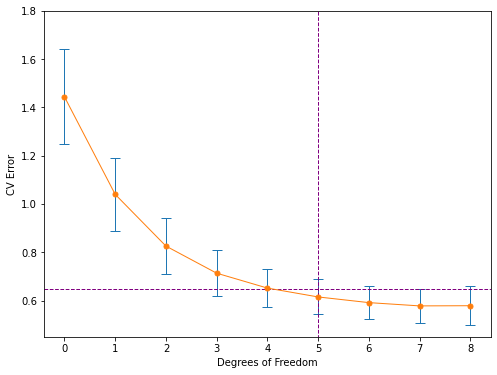

In [13]:
plt.figure(figsize=(8, 6))
plt.errorbar(x_cv, y_cv_mean, yerr=y_cv_std, capsize=5, ecolor='C0', color='C1', elinewidth=1, linewidth=1, marker='o', markersize=5)
x_cvv = np.linspace(-0.4, 8.4, 20)
y_cvv = np.linspace(0.4, 1.8, 20)

plt.plot(x_cvv, upper_bound * np.ones(len(x_cvv)), '--', color='purple', linewidth=1)
plt.plot(best_df * np.ones(len(y_cvv)), y_cvv, '--', color='purple', linewidth=1)

plt.xlim([-0.4, 8.4])
plt.ylim([0.45, 1.8])
plt.xlabel('Degrees of Freedom')
plt.ylabel('CV Error')
plt.show()

This result is obtained after carefully choosing the `seed` in the cross validation. Sometimes, for different `seed`, we obtain the best model at $df(\lambda)=4$. Also, the standard error here is calculated based using $\frac{\sigma}{\sqrt(N)}$, where $N$ is the number of data to calculate the mean. So, the standard error bars might not be exactly like the ones in the book.

#### Profile of Ridge Coefficients

This section aims to reproduce Figure 3.8. It requires us to generate more $\lambda$ for the given range of $df(\lambda)$.

In [14]:
# setup df and lambda
df_lambda = np.linspace(1, 7.2, 23)
lambdas, df_lambda = calculate_lambda_given_df(x_train, df_lambda)

column_names = prostate_cancer.meta[:-1]

coefficients = dict()
for lambda_ in lambdas:
    ridgereg = RidgeRegression()
    ridgereg.fit(x_train, y_train, lambda_)

    for beta_hat_, column in zip(ridgereg.beta_hat, column_names):
        if np.isnan(beta_hat_):
            beta_hat_ = 0
            
        if column in coefficients.keys():
            coefficients[column].append(beta_hat_)
        else:
            coefficients[column] = [beta_hat_]

Now, we plot the profiles of the ridge coefficients. We added a vertical line at $df(\lambda)=0.5$, the value chosen by cross-validation:

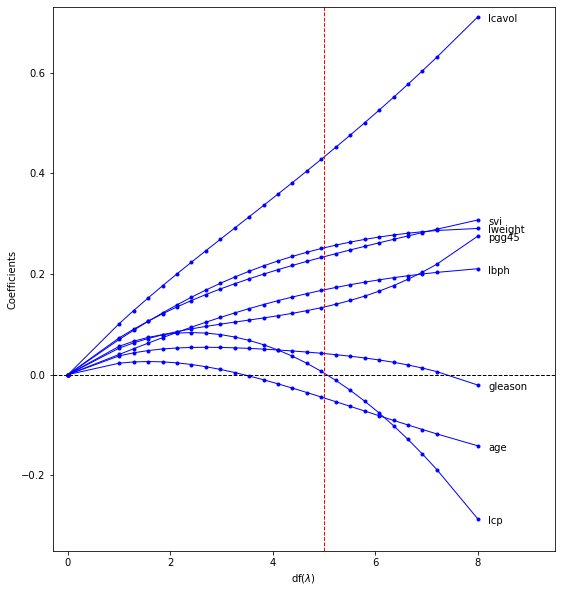

In [15]:
plt.figure(figsize=(9, 10))

for column in coefficients.keys():
    plt.plot(df_lambda, coefficients[column], 'b-o', linewidth=1.0, markersize=3)
    plt.annotate(column, xy=(8.2, coefficients[column][-1] - 0.01))

# plt.plot(df_lambda, RSS)
plt.xlim([-0.3, 9.5])
plt.ylim([-0.35, 0.73])
plt.plot(np.linspace(-0.3, 9.5, len(df_lambda)), np.zeros_like(df_lambda), 'k--', linewidth=1.0)
plt.plot(5 * np.ones(len(np.linspace(-0.35, 0.73))), np.linspace(-0.35, 0.73), 'r--', linewidth=1.0)
plt.xlabel('df($\lambda$)')
plt.ylabel('Coefficients')
plt.show()